In [1]:
%pylab inline
pylab.rcParams['figure.figsize'] = (10, 6)
import numpy as np
import config

import plotting_helpers as plots
import tutorial_helpers as utils
from widget_helpers import dim_select, csd_select, kcsd_select, accordion

Populating the interactive namespace from numpy and matplotlib


In [2]:
#Select dimensions of your setup
dim_select

ToggleButtons(description='Dimensions of the setup:', options=('1D', '2D', '3D'), tooltips=['Laminar probes', 'MEA like flat electrodes', 'Utah array or SEEG'], value='1D')

In [11]:
# Select a type of CSD source
csd_select

ToggleButtons(description='True source type', index=1, options=('monopole gauss', 'dipole gauss'), value='dipole gauss')

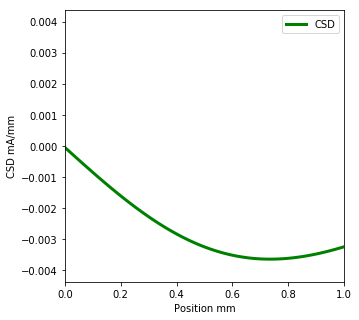

In [12]:
csd_at, true_csd = utils.generate_csd(config.csd_profile, seed=2)
plots.show_csd(csd_at, true_csd)

Shape of the ele_pos array:  (30, 1)
Number of electrodes:  30


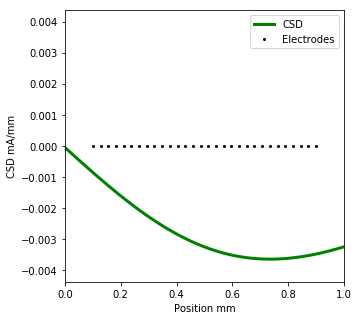

In [13]:
 #Lets add some electrodes which span the CSD space                                                                                                                                                                                                    
num_ele, ele_pos = utils.generate_electrodes()
plots.show_csd(csd_at, true_csd, show_ele=ele_pos)
print('Shape of the ele_pos array: ', ele_pos.shape)
print('Number of electrodes: ',ele_pos.shape[0])

In [14]:
# Lets emulate the case when some of the electrodes are broken / used for stimulation
#ele_seed = np.random.RandomState(13)
#ele_fail = ele_seed.choice(num_ele, 3, replace=False)
#ele_pos_new = np.delete(ele_pos, ele_fail, axis=0)
#plots.show_csd(csd_at, true_csd, show_ele=ele_pos)
#print('Shape of the ele_pos array: ', ele_pos.shape)
#print('Number of electrodes: ',ele_pos.shape[0])

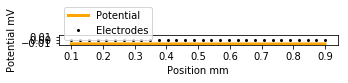

In [15]:
# Lets compute the potential recorded by these electrodes due to the CSD
h = 10.
sigma = 1.
pots = utils.calculate_potential(csd_at, true_csd, ele_pos, h, sigma)
plots.show_pot(ele_pos, pots)

In [16]:
#Select kCSD method
kcsd_select

ToggleButtons(description='KCSD method', options=('KCSD1D',), value='KCSD1D')

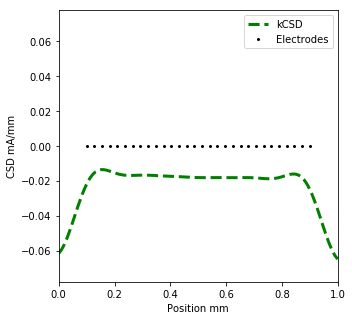

In [17]:
####TODO temporal illustration here
#Lets do KCSD!
k = config.kCSD(ele_pos, pots, **config.defaults[config.kCSD.__name__]) 
est_csd = k.values()[:,...,0]
est_pos = k.estm_pos
plots.show_csd(est_pos, est_csd, show_ele=ele_pos, show_kcsd=True)

Cross validating R (all lambda) : 0.1
Cross validating R (all lambda) : 0.11
Cross validating R (all lambda) : 0.12
Cross validating R (all lambda) : 0.13
Cross validating R (all lambda) : 0.14
Cross validating R (all lambda) : 0.15
Cross validating R (all lambda) : 0.16
Cross validating R (all lambda) : 0.17
Cross validating R (all lambda) : 0.18
Cross validating R (all lambda) : 0.19
Cross validating R (all lambda) : 0.2
Cross validating R (all lambda) : 0.21
Cross validating R (all lambda) : 0.22
Cross validating R (all lambda) : 0.23
Cross validating R (all lambda) : 0.24
R, lambda : 0.16 3.87467512046e-15


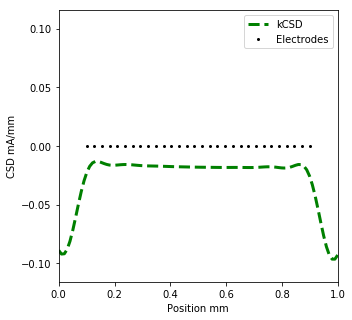

In [18]:
k.cross_validate(Rs=np.arange(0.10, 0.25, 0.01), lambdas=np.logspace(15,-25, 35))
est_csd = k.values()[:,...,0]
plots.show_csd(est_pos, est_csd, show_ele=ele_pos, show_kcsd=True)